---
## <a class="anchor" id="data">I. Data Import </a>

### 1. Libraries

In [1]:
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline
import plotly as py
from sklearn.preprocessing import StandardScaler
import re
from P5_Openclassroom_Functions import  *

from datetime import timedelta
import matplotlib.dates as mdates
import sidetable
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from datetime import datetime as dt
%matplotlib inline
sns.set_style("whitegrid")
from math import radians, cos, sin, asin, sqrt
from time import time

init_notebook_mode(connected=True)
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

---
### 2. Importing data


In [2]:
df= pd.read_csv('../data/df_customer_data_mart.csv',sep=',')

In [3]:
# deleting the "Unnamed" columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.shape

(91160, 58)

In [5]:
df['customer_unique_id'].duplicated().value_counts()

customer_unique_id
False    91160
Name: count, dtype: int64

## Préparation

In [6]:
#, 'order_line_cube_in_ltr_log','freight_value' ,'price_log''review_score',, 'geolocation_lng','freight_value','product_category_encoded','payment_type_encoded'
# Créer un nouveau DataFrame avec les colonnes numériques, 'order_line_cube_in_ltr_log'


#numerical_columns = ['freight_value','harvesine_distance', 'review_score','frequency', 'recency',  'avg_comment','estimated_duration','shipping_duration', 'order_line_cube_in_ltr','total_payment']
#numerical_columns = ['geolocation_zip_code_prefix','payment_type_encoded','freight_value', 'review_score_mean','frequency', 'product_category_encoded','recency', 'geolocation_lat', 'geolocation_lng','avg_comment','estimated_duration_log','shipping_duration_log', 'order_line_cube_in_ltr_log','total_payment_log']

numerical_columns = ['freight_value', 'review_score_mean','frequency', 'recency',  'avg_comment_log','estimated_duration_days','shipping_duration_days', 'order_line_cube_in_ltr','total_payment_log']

pca_df = df[numerical_columns].copy()
data_conclusion=df.copy()

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Créer un nouveau DataFrame avec les colonnes numériques
pca_df = df[numerical_columns].copy()

# Supprimer les lignes avec des valeurs manquantes (NaN)
pca_df.dropna(inplace=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(pca_df[numerical_columns])
#X_sc = pd.merge(X[numerical_columns], df[log_columns])
n_comp = 8
pca = PCA(n_components=n_comp).fit(X)

pca_df = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=numerical_columns).T

X_proj = pca.transform(X)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

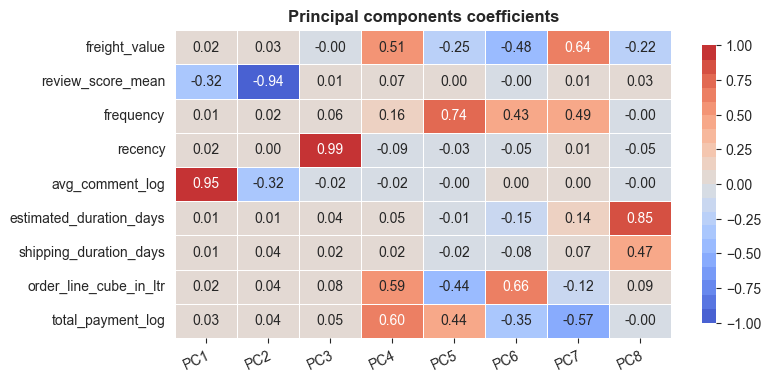

In [8]:

plot_heatmap(pca_df,'Principal components coefficients', vmin=-1, vmax=1, center=0,
             palette=sns.color_palette("coolwarm", 20),figsize=(8,4),shape='rect')
plt.show()

In [29]:
nb_clusters_agg=10

scaler = MinMaxScaler()
X_scaled_bis = scaler.fit_transform(X_proj[:,0:4])
#X_scaled_bis = scaler.fit_transform(X_proj)

# Tunning hyperparameters
## Kmeans

In [10]:
hyper_sil = []
hyper_dav = []
hyper_cal = []

for x in [10, 20, 30, 40,50,60]:
    cluster_km_c = KMeans(n_clusters=10, init='k-means++', n_init=x, max_iter=x*10, random_state=42)
    labels = cluster_km_c.fit(X_scaled_bis).labels_
    hyper_sil.append(silhouette_score(X_scaled_bis, labels))
    hyper_dav.append(davies_bouldin_score(X_scaled_bis, labels))
    hyper_cal.append(calinski_harabasz_score(X_scaled_bis, labels))

In [11]:
scores = pd.DataFrame()
scores['silhouette_score'] = hyper_sil
scores['calinski_harabasz_score'] = hyper_cal
scores['davies_bouldin_score'] = hyper_dav
scores

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,0.232414,36357.599278,1.382831
1,0.253696,36543.229222,1.327301
2,0.253019,36544.390630,1.329362
3,0.269474,36938.244559,1.246638


Text(0.5, 1.0, 'Kmeans')

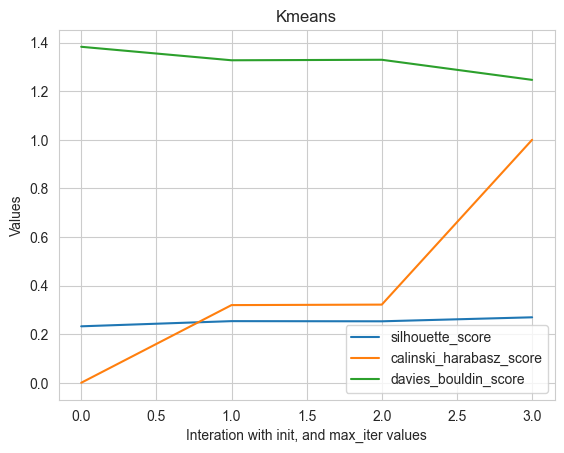

In [12]:
scores['calinski_harabasz_score'] = (scores['calinski_harabasz_score']-scores['calinski_harabasz_score'].min())/(scores['calinski_harabasz_score'].max()-scores['calinski_harabasz_score'].min())
scores.plot()
plt.xlabel("Interation with init, and max_iter values")
plt.ylabel("Values")
plt.title("Kmeans")

Birch

In [97]:
from sklearn.cluster import Birch

# Votre code pour utiliser la classe Birch ici

hyper_sil_brc = []
hyper_dav_brc = []
hyper_cal_brc = []

for x in [0.05, 0.1,0.2,0.3,0.4]:
 
    cluster_brc_c = Birch(branching_factor = 200, n_clusters= 3, threshold= x)
    labels_brc = cluster_brc_c.fit(X_scaled_bis).labels_
    hyper_sil_brc.append(silhouette_score(X_scaled_bis, labels_brc))
    hyper_dav_brc.append(davies_bouldin_score(X_scaled_bis, labels_brc))
    hyper_cal_brc.append(calinski_harabasz_score(X_scaled_bis, labels_brc))
scores_brc = pd.DataFrame()
scores_brc['silhouette_score'] = hyper_sil_brc
scores_brc['calinski_harabasz_score'] = hyper_cal_brc
scores_brc['davies_bouldin_score'] = hyper_dav_brc
scores_brc
    

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,0.711969,110170.465251,0.431088
1,0.586981,56862.283600,0.791631
2,0.583541,25696.492640,0.742961
3,0.715206,109045.054576,0.391941
4,0.715466,109405.879470,0.392883


Text(0.5, 1.0, 'Birch')

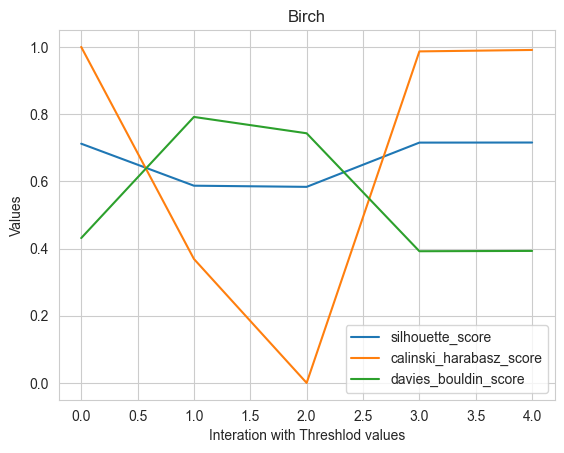

In [98]:
scores_brc['calinski_harabasz_score'] = (scores_brc['calinski_harabasz_score']-scores_brc['calinski_harabasz_score'].min())/(scores_brc['calinski_harabasz_score'].max()-scores_brc['calinski_harabasz_score'].min())
scores_brc.plot()
plt.xlabel("Interation with Threshlod values")
plt.ylabel("Values")
plt.title("Birch")

In [96]:
hyper_sil_brc = []
hyper_dav_brc = []
hyper_cal_brc = []

for x in [20,200,2000,20000]:
    cluster_brc_c = Birch(branching_factor = x, n_clusters= 3, threshold= 0.4)
    labels_brc = cluster_brc_c.fit(X_scaled_bis).labels_
    hyper_sil_brc.append(silhouette_score(X_scaled_bis, labels_brc))
    hyper_dav_brc.append(davies_bouldin_score(X_scaled_bis, labels_brc))
    hyper_cal_brc.append(calinski_harabasz_score(X_scaled_bis, labels_brc))
scores_brc = pd.DataFrame()
scores_brc['silhouette_score'] = hyper_sil_brc
scores_brc['calinski_harabasz_score'] = hyper_cal_brc
scores_brc['davies_bouldin_score'] = hyper_dav_brc
scores_brc

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,0.715466,109405.87947,0.392883
1,0.715466,109405.87947,0.392883
2,0.715466,109405.87947,0.392883
3,0.715466,109405.87947,0.392883


Text(0.5, 1.0, 'Birch')

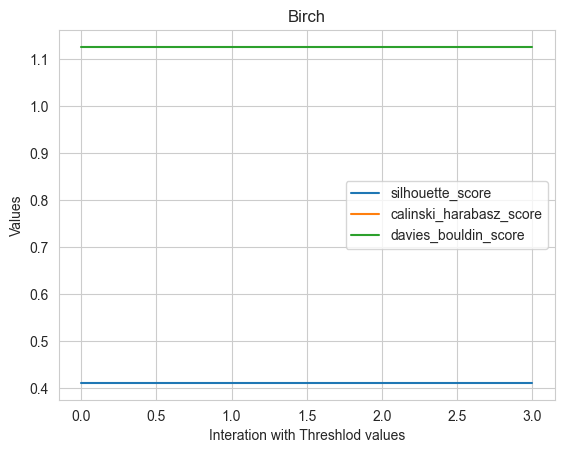

In [16]:
scores_brc['calinski_harabasz_score'] = (scores_brc['calinski_harabasz_score']-scores_brc['calinski_harabasz_score'].min())/(scores_brc['calinski_harabasz_score'].max()-scores_brc['calinski_harabasz_score'].min())
scores_brc.plot()
plt.xlabel("Interation with Threshlod values")
plt.ylabel("Values")
plt.title("Birch")

# <font color="#476bff" id="section_6">Stabilité temporelle de la segmentation</font>
Dans le but d'établir un contrat de maintenance de l'algorithme de segmentation client, nous devons tester sa stabilité dans le temps et voir, par exemple, à quel moment les clients changent de Cluster.

Pour cela, nous devons recalculer toutes les features en fonction d'une période donnée. 

In [17]:
numerical_columns = ['freight_value', 'review_score_mean','frequency', 'recency',  'avg_comment_log','estimated_duration_days','shipping_duration_days', 'order_line_cube_in_ltr','total_payment_log']



In [18]:
numerical_columns

['freight_value',
 'review_score_mean',
 'frequency',
 'recency',
 'avg_comment_log',
 'estimated_duration_days',
 'shipping_duration_days',
 'order_line_cube_in_ltr',
 'total_payment_log']

In [117]:

from math import radians, cos, sin, asin, sqrt
from time import time
import pandas as pd
import numpy as np
from P5_Openclassroom_Functions import  *
from sklearn.impute import SimpleImputer
def make_dataset(dpath="data/", initial=False, period=2):
    """Cleaning and feature engineering on complete Olist data 
        for preparation of unsupervised classification (K-Means).

    Parameters
    ----------
    dpath : str
        Path to the directory containing the data.
    initial : boolean
        Defines whether the created dataset is the initial dataset.
    period : int
        Increment period in months after initial dataset.
    """
    start_time = time()
    print("Création du dataset en cours ...")
    
    # Root path
    root_path = dpath
    
    # Load datasets
    df_customers = pd.read_csv(root_path + "olist_customers_dataset.csv")
    df_geolocation = pd.read_csv(root_path + "olist_geolocation_dataset.csv")
    df_orders = pd.read_csv(root_path + "olist_orders_dataset.csv")
    df_order_items = pd.read_csv(root_path + "olist_order_items_dataset.csv")
    df_payments = pd.read_csv(root_path + "olist_order_payments_dataset.csv")
    df_reviews = pd.read_csv(root_path + "olist_order_reviews_dataset.csv")
    df_products = pd.read_csv(root_path + "olist_products_dataset.csv")
    df_translations = pd.read_csv(root_path + "product_category_name_translation.csv")
    
    # Merge datasets
    # ## Preparation la table Orders
 
    df_orders['order_time'] = pd.to_datetime(df_orders['order_purchase_timestamp']).dt.time
    df_orders['delivery_time'] = pd.to_datetime(df_orders['order_delivered_carrier_date']).dt.time
    convert_to_dt(df_orders, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
    df_orders.sort_values(by = 'order_purchase_timestamp', inplace = True)
    datetime_cols = ["order_purchase_timestamp", 
                     "order_delivered_customer_date"]
    for col in datetime_cols:
      df_orders[col] = df_orders[col].astype('datetime64[ns]')
     ## Select orders on period
    start=df_orders["order_purchase_timestamp"].min()
    if(initial == True):
        period = 12
    else:
        period = 12+period
    stop=start + pd.DateOffset(months=period)
    print("start period : ",start)  
    print("stop period  : " ,stop)         
    df_orders = df_orders[(df_orders["order_purchase_timestamp"]>=start)
                              & (df_orders["order_purchase_timestamp"]<stop)]
       
    # List of orders on period
    period_orders = df_orders.order_id.unique()
    df_orders[df_orders['order_id'].isin(period_orders)]
    df_order_items[df_order_items['order_id'].isin(period_orders)]
  
   # Assuming df_orders is your DataFrame
    # Convert the datetime columns to Pandas datetime objects if they are not already
    df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
    df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
    df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
    # Calculate the time difference and store it in a new column
    df_orders['shipping_time_delta'] = df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']
    df_orders['shipping_duration'] = df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
    df_orders['estimated_duration'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']
      ## Preparation la table OrderItems
    df_order_items_consolidated = df_order_items\
    .groupby(by = ['product_id','order_id'], as_index=False)\
    .agg({
        'order_item_id': 'count', 
        'seller_id': 'first',
        'shipping_limit_date': 'first',
        'price': 'first',
        'freight_value': 'first'
        })
    df_order_items_consolidated[df_order_items_consolidated['order_item_id']>1]
    # Renaming new quantity column
    df_order_items_consolidated\
    .rename(columns = {'order_item_id': 'qty'}, inplace = True)
    df_order_items_consolidated = df_orders\
    .merge(df_order_items_consolidated, on = 'order_id')
  
       
   
 
    #table Product
    df_order_items_consolidated = df_order_items_consolidated\
    .merge(df_products, on = 'product_id')
    subst_mean(df_order_items_consolidated, [
    'product_length_cm',
    'product_weight_g',
    'product_height_cm',
    'product_width_cm'
    ])
    df_order_items_consolidated['order_line_cube_in_ltr']\
    = df_order_items_consolidated['product_length_cm']\
    *df_order_items_consolidated['product_height_cm']\
    *df_order_items_consolidated['product_width_cm']\
    *df_order_items_consolidated['qty'] /1000
    ## Preparation la table Customer
    # Creating a customer dictionary as a lookup source
    df_customer_data_mart=df_order_items_consolidated.copy()
    dict_customer = df_customers.set_index('customer_id').to_dict()['customer_unique_id']
    df_customer_data_mart['customer_unique_id'] = df_customer_data_mart['customer_id'].map(dict_customer)
    df_customer_data_mart = df_customer_data_mart.merge(df_customers[['customer_unique_id','customer_city','customer_state']], how = 'inner', left_on = 'customer_unique_id', right_on = 'customer_unique_id')  
    df_customer_data_mart = df_customer_data_mart.rename(columns={"customer_city": "city"})
    df_customer_data_mart = df_customer_data_mart.rename(columns={"customer_state": "state"})
    ## Preparation la table Translations
    # adding the english procuct category name to the products list
    df_products = df_products.merge(df_translations, on='product_category_name', how='left')
    # Adding manually translations
    df_products['product_category_name_english'] = np.where(df_products[
    'product_category_name']=='pc_gamer',
    'pc_games',
    df_products['product_category_name_english'
    ])
    df_products['product_category_name_english'] = np.where(df_products[
    'product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos',
    'portable_cooking_ware',
    df_products['product_category_name_english'
    ])
    dict_tranlate = df_products.set_index('product_category_name')\
    .to_dict()['product_category_name_english']
    df_customer_data_mart['product_category_name_english']\
    = df_customer_data_mart['product_category_name'].map(dict_tranlate)
    df_customer_data_mart[['product_category_name', 'product_category_name_english']]
    ## Preparation la table payements
    df_customer_data_mart = df_customer_data_mart.merge(df_payments[['payment_type','order_id']], how = 'left',on='order_id') 
    ## Preparation la table order review
    imputerSimpleReview = SimpleImputer(strategy='constant', fill_value='')
    df_reviews.loc[:,['review_comment_title', 'review_comment_message']] = imputerSimpleReview.fit_transform(df_reviews.loc[:,['review_comment_title', 'review_comment_message']])
    df_reviews['length_reviews_comment'] = df_reviews['review_comment_message'].map(len)
    df_reviews['count_comment'] = pd.Series([1 if x >0 else 0 for x in df_reviews['review_comment_message'].map(len)])
    df_reviews['number_reviews'] = df_reviews.groupby('order_id').count_comment.transform('nunique') 
    df_customer_data_mart = df_customer_data_mart.merge(df_reviews.groupby('order_id')['length_reviews_comment'].agg('mean'),how='left',on='order_id')
    df_customer_data_mart = df_customer_data_mart.merge(df_reviews.groupby('order_id')['number_reviews'].agg('mean'),how='left',on='order_id')
    df_customer_data_mart['avg_comment'] = df_customer_data_mart['length_reviews_comment']/df_customer_data_mart['number_reviews']
    df_customer_data_mart.drop(['length_reviews_comment', 'number_reviews'], axis=1, inplace=True)
    df_customer_data_mart = df_customer_data_mart.merge(df_reviews[['order_id','review_score']], how = 'inner', left_on = 'order_id', right_on = 'order_id')  
    ## Preparation la table geolocation
    dict_cust_zip = df_customers.set_index('customer_id').to_dict()['customer_zip_code_prefix']
    dict_lat = df_geolocation.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lat']
    dict_lng = df_geolocation.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lng']
    df_customer_data_mart['geolocation_zip_code_prefix']\
    = df_customer_data_mart['customer_id'].map(dict_cust_zip)
    # Adding coordinates and color code to the dataframe
    df_customer_data_mart['geolocation_lat']\
    = df_customer_data_mart['geolocation_zip_code_prefix'].map(dict_lat)
    df_customer_data_mart['geolocation_lng']\
    = df_customer_data_mart['geolocation_zip_code_prefix'].map(dict_lng)
    # Olist location
    olist_lat = -25.43045
    olist_lon = -49.29207
    df_customer_data_mart['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(df_customer_data_mart.geolocation_lat, 
                                              df_customer_data_mart.geolocation_lng)]
    latestdate = np.max(df_customer_data_mart['order_purchase_timestamp'])
    df_customer_data_mart['recency'] = df_customer_data_mart['order_purchase_timestamp'].apply(lambda x: (latestdate - x).days)
    df_customer_data_mart['total_price'] = df_customer_data_mart['qty'] * df_customer_data_mart['price']+df_customer_data_mart['freight_value']
    gb_products_bought = df_customer_data_mart.groupby(['customer_unique_id']).agg({'total_price':'sum', 'review_score':'mean',  'order_id':'count','order_line_cube_in_ltr':'sum'}).reset_index()
    gb_products_bought.rename(columns={
    'order_id': 'frequency',
    'review_score': 'review_score_mean',
    'total_price': 'total_payment'   
    }, inplace=True)
    # Fusionner les DataFrames sur la colonne 'customer_unique_id'
    df_customer_data_mart = df_customer_data_mart.merge(gb_products_bought[['customer_unique_id', 'total_payment', 'review_score_mean', 'frequency']], 
                                                      how='inner', 
                                                      on='customer_unique_id')

    df_customer_data_mart['product_category'] = df_customer_data_mart['product_category_name_english'].apply(classify_cat)
    df_customer_data_mart['product_category_encoded'] = df_customer_data_mart['product_category'].astype('category').cat.codes
    # Convertir la colonne payment_type_encoded en int
    df_customer_data_mart['product_category_encoded'] = df_customer_data_mart['product_category_encoded'].astype(int)
    df_customer_data_mart['payment_type_encoded'] = df_customer_data_mart['payment_type'].astype('category').cat.codes
    # Convertir la colonne payment_type_encoded en int
    df_customer_data_mart['payment_type_encoded'] = df_customer_data_mart['payment_type_encoded'].astype(int)
    df_customer_data_mart['shipping_duration'] = pd.to_timedelta(df_customer_data_mart['shipping_duration'])
    # Extraire le nombre de jours à partir de l'objet timedelta
    df_customer_data_mart['shipping_duration_days'] = df_customer_data_mart['shipping_duration'].dt.days
    # Convertir la colonne 'shipping_duration' en un objet timedelta
    df_customer_data_mart['estimated_duration'] = pd.to_timedelta(df_customer_data_mart['estimated_duration'])
    # Extraire le nombre de jours à partir de l'objet timedelta
    df_customer_data_mart['estimated_duration_days'] = df_customer_data_mart['estimated_duration'].dt.days
    df_customer_data_mart['estimated_duration_log'] = np.log(df_customer_data_mart['estimated_duration_days'])
    df_customer_data_mart['shipping_duration_log'] = np.log(df_customer_data_mart['shipping_duration_days']+1e-10)
    df_customer_data_mart['order_line_cube_in_ltr_log'] = np.log(df_customer_data_mart['order_line_cube_in_ltr'])
    df_customer_data_mart['price_log'] = np.log(df_customer_data_mart['price'])
    df_customer_data_mart['avg_comment_log'] = np.log(df_customer_data_mart['avg_comment']+1e-10)
    df_customer_data_mart['total_payment_log'] = np.log(df_customer_data_mart['total_payment'])
    df_customer_data_mart['recency_log'] = np.log(df_customer_data_mart['recency'])
    
    '''['freight_value',
 'review_score_mean',
 'frequency',
 'recency',
 'avg_comment_log',
 'estimated_duration_days',
 'shipping_duration_days',
 'order_line_cube_in_ltr',
 'total_payment_log']'''
    
    # Group datas by unique customers
    data = df_customer_data_mart.groupby(["customer_unique_id"]).agg(
        freight_value=pd.NamedAgg(column="freight_value", aggfunc="sum"),
        review_score_mean=pd.NamedAgg(column="review_score_mean", aggfunc="mean"),
        frequency=pd.NamedAgg(column="frequency", aggfunc="sum"),
        recency=pd.NamedAgg(column="recency", aggfunc="sum"),
        avg_comment_log=pd.NamedAgg(column="avg_comment_log", aggfunc="mean"),
        estimated_duration_days=pd.NamedAgg(column="estimated_duration_days", aggfunc="mean"),
        shipping_duration_days=pd.NamedAgg(column="shipping_duration_days", aggfunc="mean"),
        order_line_cube_in_ltr=pd.NamedAgg(column="order_line_cube_in_ltr", aggfunc="sum"),
        total_payment_log=pd.NamedAgg(column="total_payment_log", aggfunc="sum"))
        
    

    
    # complete missing values
    features_to_fill = data.isnull().sum()
    features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)
    print("features_to_fill :",features_to_fill)
 
    end_time = time()
    print("Durée d'execution du Feature engineering : {:.2f}s".format(end_time - start_time))
    
    return data

In [118]:
# Initial period of 12 months
data_init = make_dataset(dpath="../data/", initial=True, period=2)

Création du dataset en cours ...
start period :  2017-01-05 00:00:00
stop period  :  2018-01-05 00:00:00


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
shipping_duration_days 	 8.0
______________________________________________________
Durée d'execution du Feature engineering : 8.72s


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



In [101]:
nombre_de_duplicatas = data_init.duplicated().sum()
print("Nombre de duplicatas dans la colonne 'customer_unique_id' :", nombre_de_duplicatas)

Nombre de duplicatas dans la colonne 'customer_unique_id' : 23


In [102]:
data_init.shape

(43594, 9)

In [103]:
duplicates = data_init[data_init.duplicated()]

# Affichez les lignes en double
print("Lignes en double :\n", duplicates.count())

Lignes en double :
 freight_value              23
review_score_mean          23
frequency                  23
recency                    23
avg_comment_log            23
estimated_duration_days    23
shipping_duration_days     23
order_line_cube_in_ltr     23
total_payment_log          23
dtype: int64


Nous allons ensuite déterminer la période totale à couvrir :

In [119]:
olist_path = "../data/"
orders = pd.read_csv(olist_path+"olist_orders_dataset.csv")
orders = orders.loc[orders.order_status == "delivered", 
                    "order_purchase_timestamp"]

orders = pd.to_datetime(orders)

# Calculer la durée en mois
time_delta = (orders.max() - orders.min()) / pd.Timedelta(days=30)


print("La période complète des commandes porte sur {} mois.".format(time_delta))

La période complète des commandes porte sur 23.770462577160494 mois.


Pour déterminer le moment où les clients changent de cluster, nous allons **itérer le K-Means sur toute la période avec des deltas de 2 mois et calculer le score ARI**, en prenant garde à bien comparer les mêmes clients *(ceux des 12 mois initiaux)*. 

*Ici le déroulé est créé directement dans le notebook pour explication, en production, toutes ses opérations seront regroupées dans une classe Python pour automatiser le processus.*

In [128]:
from sklearn.cluster import Birch

# Votre code pour utiliser la classe Birch ici

hyper_sil_brc = []
hyper_dav_brc = []
hyper_cal_brc = []
scaler = MinMaxScaler()
X_scaled_bis = scaler.fit_transform(data_init)

cluster_brc_c = Birch(branching_factor = 200, n_clusters= 10, threshold= 0.1)
labels_brc = cluster_brc_c.fit(X_scaled_bis).labels_
hyper_sil_brc.append(silhouette_score(X_scaled_bis, labels_brc))
hyper_dav_brc.append(davies_bouldin_score(X_scaled_bis, labels_brc))
hyper_cal_brc.append(calinski_harabasz_score(X_scaled_bis, labels_brc))
scores_brc = pd.DataFrame()
scores_brc['silhouette_score'] = hyper_sil_brc
scores_brc['calinski_harabasz_score'] = hyper_cal_brc
scores_brc['davies_bouldin_score'] = hyper_dav_brc
scores_brc

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,0.645868,54194.811841,0.909426


In [121]:
data_init.shape

(43594, 9)

In [131]:
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
K=10
ari_score = []
scaler = MinMaxScaler()
for p in np.arange(2,(time_delta-12),2):
    # Create dataset for period
    data_period = make_dataset(dpath="../data/", 
                                   initial=False, 
                                   period=p)
    
    print("la taille de period_data ",data_period.shape)    
    # Filter on initial customer client
    data_period = data_period[data_period.index.isin(data_init.index)]
      
    X_scaled_bis = scaler.fit_transform(data_period)
    cluster_brc_c = Birch(branching_factor = 200, n_clusters= 10, threshold= 0.1)
    labels_brc = cluster_brc_c.fit(X_scaled_bis).labels_
    p_labels =labels_brc
    print("le score pour ",silhouette_score(X_scaled_bis, labels_brc))         
    # Calculate ARI score
    ari_p = adjusted_rand_score(init_labels, p_labels)
    ari_score.append([p,ari_p])

Création du dataset en cours ...
start period :  2017-01-05 00:00:00
stop period  :  2018-03-05 00:00:00


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
shipping_duration_days 	 8.0
______________________________________________________
Durée d'execution du Feature engineering : 9.49s
la taille de period_data  (57109, 9)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



le score pour  0.6525178101960956
Création du dataset en cours ...
start period :  2017-01-05 00:00:00
stop period  :  2018-05-05 00:00:00


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
shipping_duration_days 	 8.0
______________________________________________________
Durée d'execution du Feature engineering : 9.38s
la taille de period_data  (70791, 9)
le score pour  0.6615657141866399
Création du dataset en cours ...
start period :  2017-01-05 00:00:00
stop period  :  2018-07-05 00:00:00


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
shipping_duration_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 10.01s
la taille de period_data  (83001, 9)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

le score pour  0.6746319806049494
Création du dataset en cours ...
start period :  2017-01-05 00:00:00
stop period  :  2018-09-05 00:00:00


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
shipping_duration_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 10.13s
la taille de period_data  (94427, 9)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

le score pour  0.6388158837899601
Création du dataset en cours ...
start period :  2017-01-05 00:00:00
stop period  :  2018-11-05 00:00:00


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
shipping_duration_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 9.85s
la taille de period_data  (94427, 9)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

le score pour  0.6388158837899601


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\User\AppData\Local\Temp\ipykernel_18264\2788583395.py:6: FutureWarning:

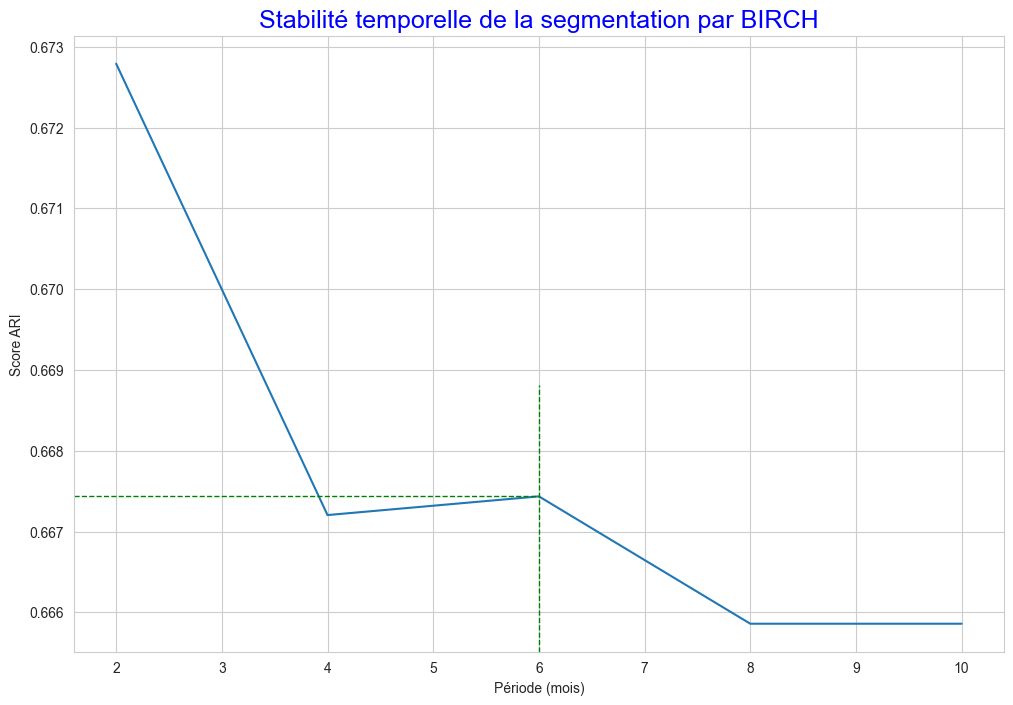

In [132]:
ari_score = pd.DataFrame(ari_score, columns=["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=ari_score, x="periode", y="ARI")
plt.axhline(y=ari_score.iloc[2][1], linestyle="--", 
            color="green",
            xmax=0.5,
            linewidth=1)
plt.axvline(x=ari_score.iloc[2][0], linestyle="--", 
            color="green",
            ymax=1.1-(ari_score.iloc[2][1]),
            linewidth=1)
plt.xlabel("Période (mois)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par BIRCH",
          fontsize=18,
          color="b")
plt.show()